# REST API: an example with the EMDB

We will use the EMDB api to find some cryo-electron microscopy data on herpes viruses.

First, we need to use a package that lets us access a webservice.
We will use the requests package: https://requests.readthedocs.io/en/

In [2]:
import requests

First, we need to know where to look for, in this case the url to access the emdb REST API:

In [8]:
emdb_api = "https://www.ebi.ac.uk/emdb/api"

In [9]:
search_term = "herpes"

search_request = f"{emdb_api}/search/{search_term}"
search_request

'https://www.ebi.ac.uk/emdb/api/search/herpes'

We see that it is a normal url. In fact, you can access this page in your browser, directly!

but let's access it using `python` and `requests`:

In [10]:
r = requests.get(search_request)

Once this has been executed, we have received data from the server (hopefully...).
First we can check what kind of response we got from the server:

In [11]:
r

<Response [200]>

The number is the status code. See for example:
- https://www.restapitutorial.com/httpstatuscodes.html (overview)
- https://developer.mozilla.org/en-US/docs/Web/HTTP/Status (more details)

You hopefully got a 200, which means it was successful

We can also access the status code part more directly, and even test it:

In [12]:
print(r.status_code)
if r.status_code != 200:
    print("Uh oh, something went wrong!")
    # here would be a good place to raise an error, if you write code like that as part of a larger program

200


We can see what response we got, first as plain text: (the slice here is just to not print a ton of lines...)

In [13]:
r.text[:400]

'[\n    {\n        "_id": "604dc569043d5cc5a7d598e7",\n        "admin": {\n            "authors_list": {\n                "author": [\n                    "Liu Y",\n                    "Heim PK",\n                    "Che Y",\n                    "Chi X",\n                    "Qiu X",\n                    "Han S",\n                    "Dormitzer PR",\n                    "Yang X"\n                ]\n            }'

this may look like gibberish, but it's actually JSON, a very popular format for sending back structured data online: https://en.wikipedia.org/wiki/JSON

we can use the `json()` method of the request object to see it in a structured manner:

In [14]:
# this may be quite long, I advise to collapse the output (top left menu -> View -> Collapse Selected Outputs)
r.json()

[{'_id': '604dc569043d5cc5a7d598e7',
  'admin': {'authors_list': {'author': ['Liu Y',
     'Heim PK',
     'Che Y',
     'Chi X',
     'Qiu X',
     'Han S',
     'Dormitzer PR',
     'Yang X']},
   'current_status': {'code': {'valueOf_': 'REL'},
    'date': '2021-03-17T00:00:00',
    'processing_site': 'RCSB'},
   'key_dates': {'deposition': '2020-10-09T00:00:00',
    'header_release': '2021-03-17T00:00:00',
    'map_release': '2021-03-17T00:00:00',
    'update': '2021-03-17T00:00:00'},
   'sites': {'deposition': 'RCSB', 'last_processing': 'RCSB'},
   'title': 'HCMV prefusion gB in complex with fusion inhibitor WAY-174865'},
  'crossreferences': {'citation_list': {'primary_citation': {'citation_type': {'author': [{'instance_type': 'author',
        'order': 1,
        'valueOf_': 'Liu Y'},
       {'instance_type': 'author', 'order': 2, 'valueOf_': 'Heim KP'},
       {'instance_type': 'author', 'order': 3, 'valueOf_': 'Che Y'},
       {'instance_type': 'author', 'order': 4, 'valueOf_':

Let's keep the resulting json in a new variable, and let's take a look at the keys in the first entry:

In [15]:
entries_json = r.json()
entries_json[0].keys()

dict_keys(['_id', 'admin', 'crossreferences', 'emdb_id', 'interpretation', 'map', 'sample', 'structure_determination_list', 'version'])

Let's take a look at the emdb id:

In [16]:
entries_json[0]["emdb_id"]

'EMD-22828'

We can go to the url of the same structure:

In [17]:
f"https://www.ebi.ac.uk/emdb/{entries_json[0]['emdb_id']}"

'https://www.ebi.ac.uk/emdb/EMD-22828'

Abd compare what is shown in the webpage to what we have in the json:

In [18]:
entries_json[0]

{'_id': '604dc569043d5cc5a7d598e7',
 'admin': {'authors_list': {'author': ['Liu Y',
    'Heim PK',
    'Che Y',
    'Chi X',
    'Qiu X',
    'Han S',
    'Dormitzer PR',
    'Yang X']},
  'current_status': {'code': {'valueOf_': 'REL'},
   'date': '2021-03-17T00:00:00',
   'processing_site': 'RCSB'},
  'key_dates': {'deposition': '2020-10-09T00:00:00',
   'header_release': '2021-03-17T00:00:00',
   'map_release': '2021-03-17T00:00:00',
   'update': '2021-03-17T00:00:00'},
  'sites': {'deposition': 'RCSB', 'last_processing': 'RCSB'},
  'title': 'HCMV prefusion gB in complex with fusion inhibitor WAY-174865'},
 'crossreferences': {'citation_list': {'primary_citation': {'citation_type': {'author': [{'instance_type': 'author',
       'order': 1,
       'valueOf_': 'Liu Y'},
      {'instance_type': 'author', 'order': 2, 'valueOf_': 'Heim KP'},
      {'instance_type': 'author', 'order': 3, 'valueOf_': 'Che Y'},
      {'instance_type': 'author', 'order': 4, 'valueOf_': 'Chi X'},
      {'insta

There is a great many information in there! We can find, for example, the date the structure was deposited to the EMDB:

In [19]:
entries_json[0]['admin']['key_dates']['deposition']

'2020-10-09T00:00:00'

We can do so for many entries too:

In [21]:
for e in entries_json[:10]:
    print(e['emdb_id'], e['admin']['key_dates']['deposition'])

EMD-22828 2020-10-09T00:00:00
EMD-30102 2020-03-12T00:00:00
EMD-30123 2020-03-14T00:00:00
EMD-30124 2020-03-14T00:00:00
EMD-22338 2020-07-20T00:00:00
EMD-31299 2021-05-13T00:00:00
EMD-31301 2021-05-13T00:00:00
EMD-23377 2021-01-27T00:00:00
EMD-31298 2021-05-13T00:00:00
EMD-31296 2021-05-12T00:00:00


And we can even store that data in a dataframe!

In [22]:
import pandas as pd
df = pd.DataFrame([(e['emdb_id'], e['admin']['key_dates']['deposition']) for e in entries_json], columns=["id", "date"])

Let's make that data into something numeric, by keeping the year only, and see how many herpes-related maps were deposited per year:

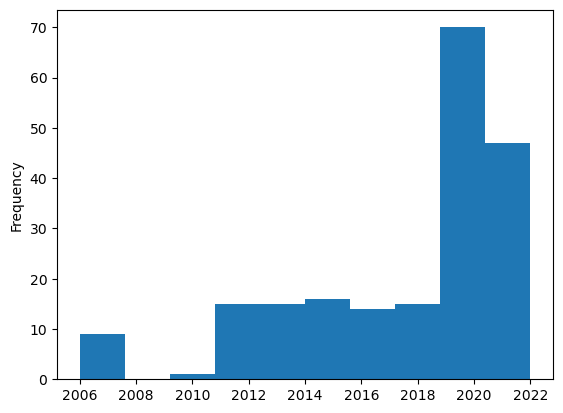

In [24]:
import matplotlib.pyplot as plt
df["year"] = df["date"].apply(lambda x: int(x[:4])) # lambda function to slice the last 4 characters of the date entry
df["year"].plot(kind="hist")
plt.show()